In [1]:
# est_hourly.paruqet

In [2]:
import matplotlib.pyplot as plt  # plotting
import numpy as np  # linear algebra
import os  # accessing directory structure
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

plt.style.use('ggplot')  # Make it pretty

In [3]:
relative_data_path = '../../data/kaggle-archive/est_hourly.paruqet'
# current executable directory
current_dir = os.getcwd()
# join the current directory and data path
data_path = os.path.join(current_dir, relative_data_path)
df = pd.read_parquet(relative_data_path)


Image path: /home/alitonia/.config/JetBrains/DataSpell2025.2/projects/workspace/code/explore/../../images/PJM_Evolution.png


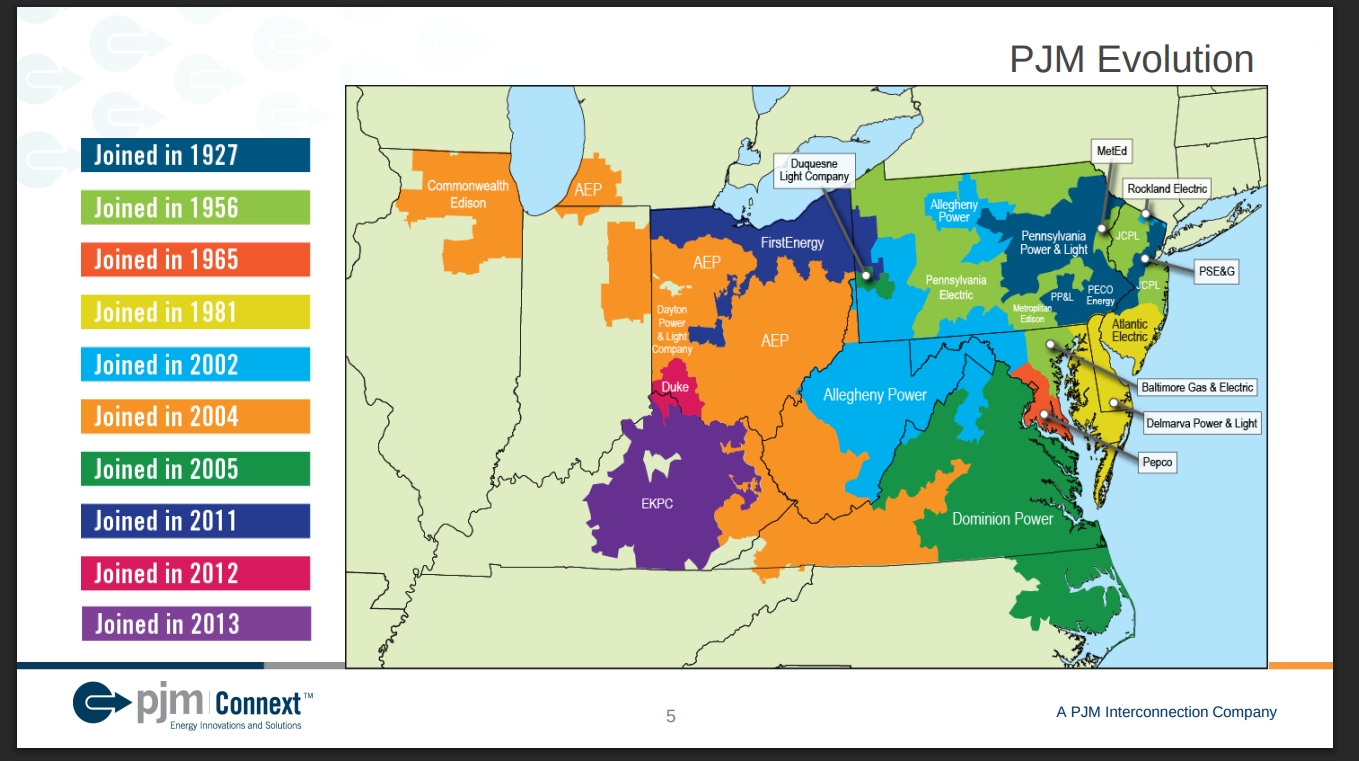

In [4]:
#Show PJM Regions
from IPython.display import Image

relative_image_path = '../../images/PJM_Evolution.png'
image_path = os.path.join(current_dir, relative_image_path)
print(f'Image path: {image_path}')
# show image
Image(image_path)

In [5]:
df.head()


,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
Datetime,,,,,,,,,,,,
1998-12-31 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1998-12-31 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
1998-12-31 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
1998-12-31 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
1998-12-31 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0


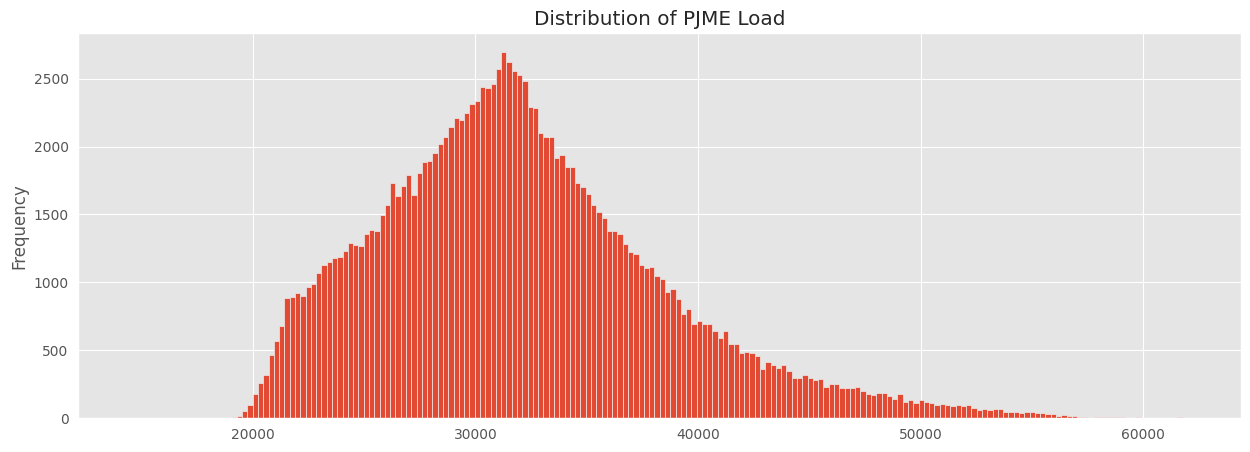

In [6]:
_ = df['PJME'].plot.hist(figsize=(15, 5), bins=200, title='Distribution of PJME Load')


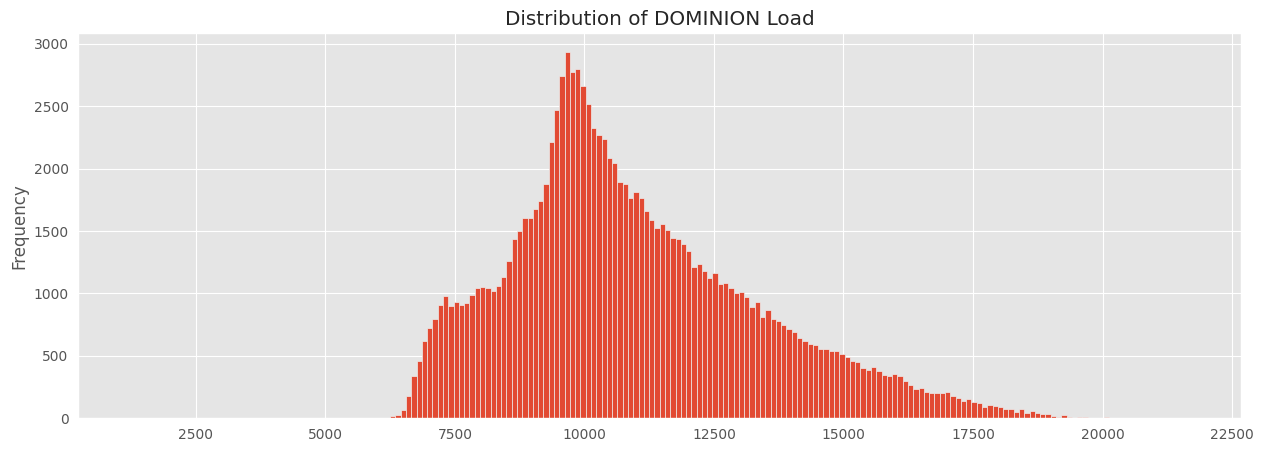

In [7]:
_ = df['DOM'].plot.hist(figsize=(15, 5), bins=200, title='Distribution of DOMINION Load')


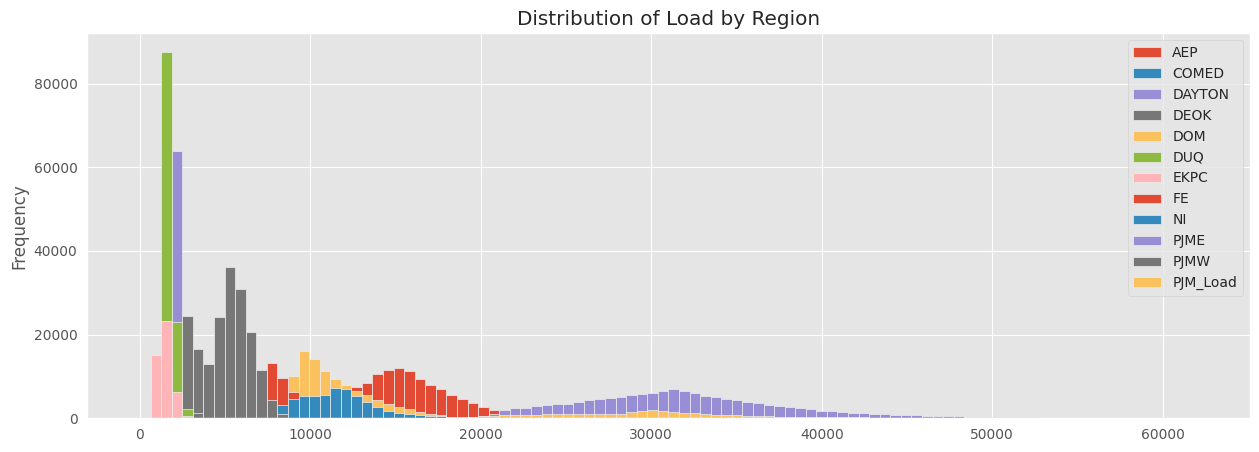

In [8]:
_ = df.plot.hist(figsize=(15, 5), bins=100, title='Distribution of Load by Region')


### Plot Time Series

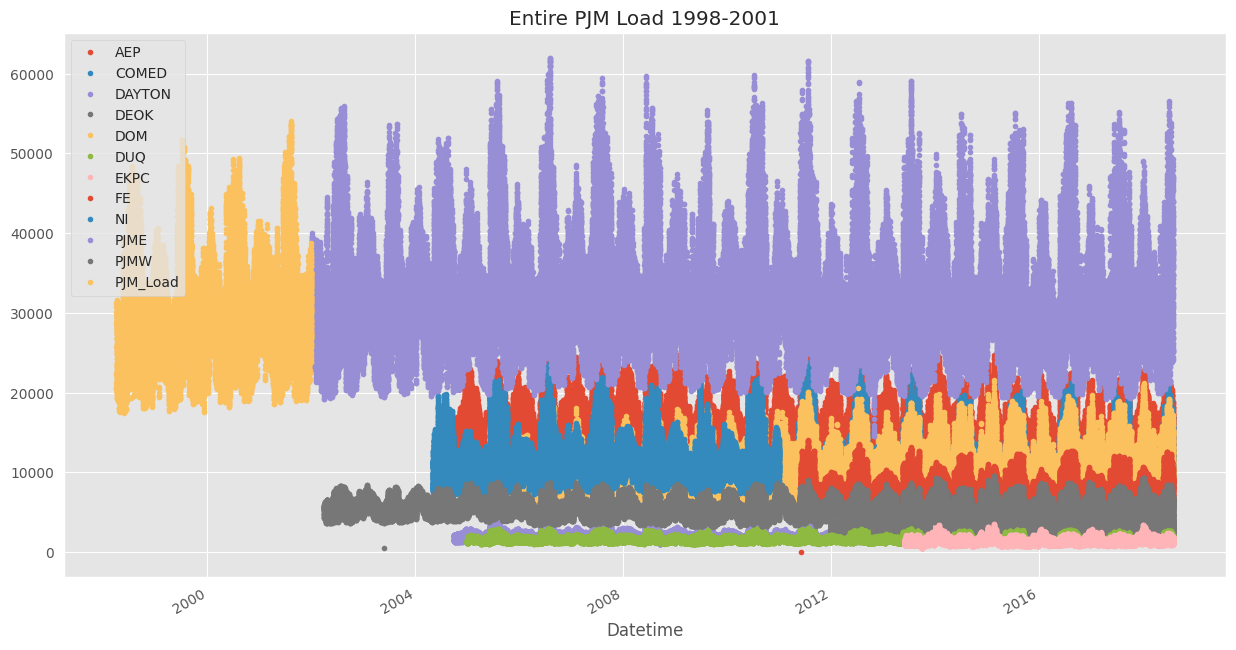

In [9]:
plot = df.plot(style='.', figsize=(15, 8), title='Entire PJM Load 1998-2001')


###  Plot Time Series

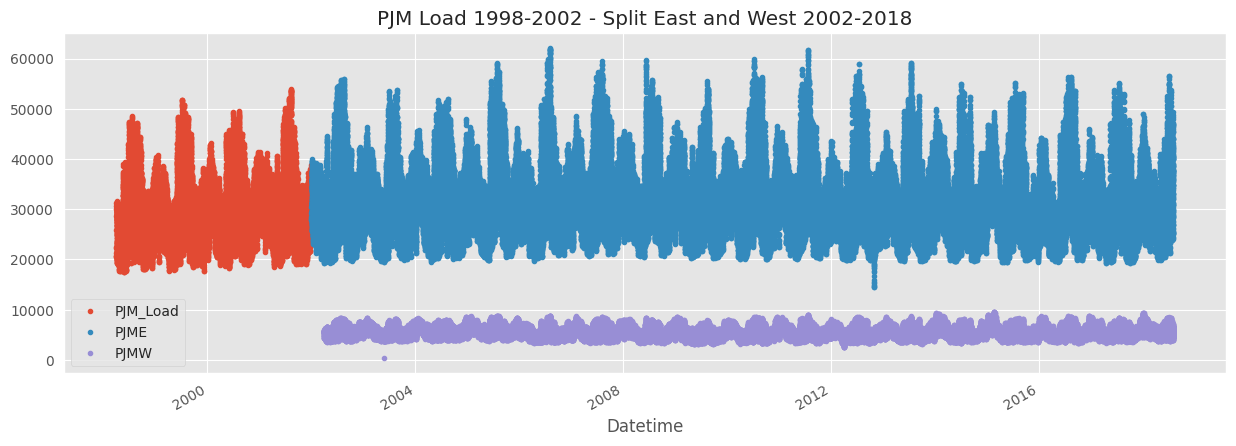

In [10]:
_ = df[['PJM_Load','PJME','PJMW']] \
    .plot(style='.', figsize=(15, 5), title='PJM Load 1998-2002 - Split East and West 2002-2018')

### Summer Demand vs Winter Demand


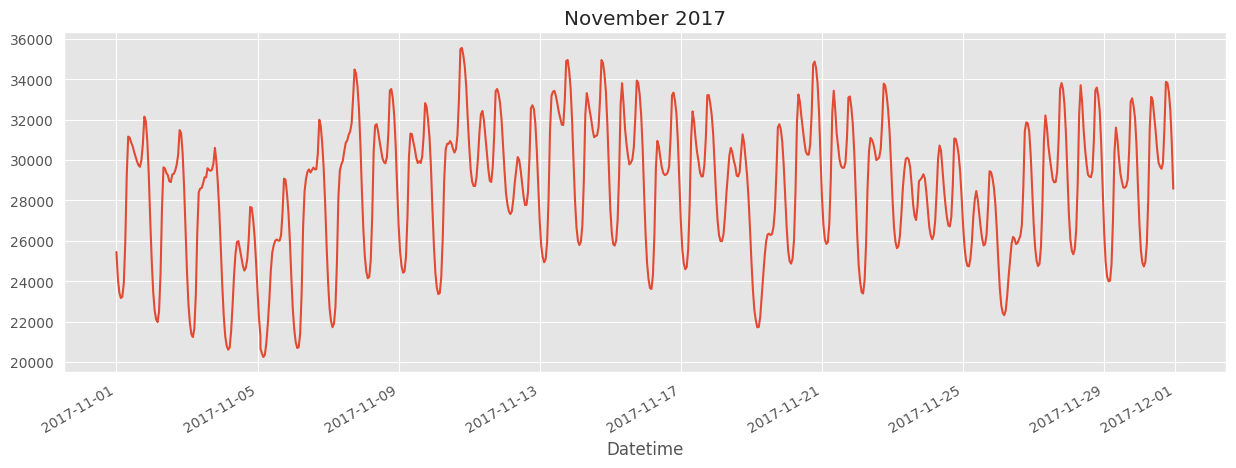

In [11]:
_ = df['PJME'].loc[(df['PJME'].index >= '2017-11-01') &
               (df['PJME'].index < '2017-12-01')] \
    .sort_index() \
    .plot(figsize=(15, 5), title = 'November 2017')

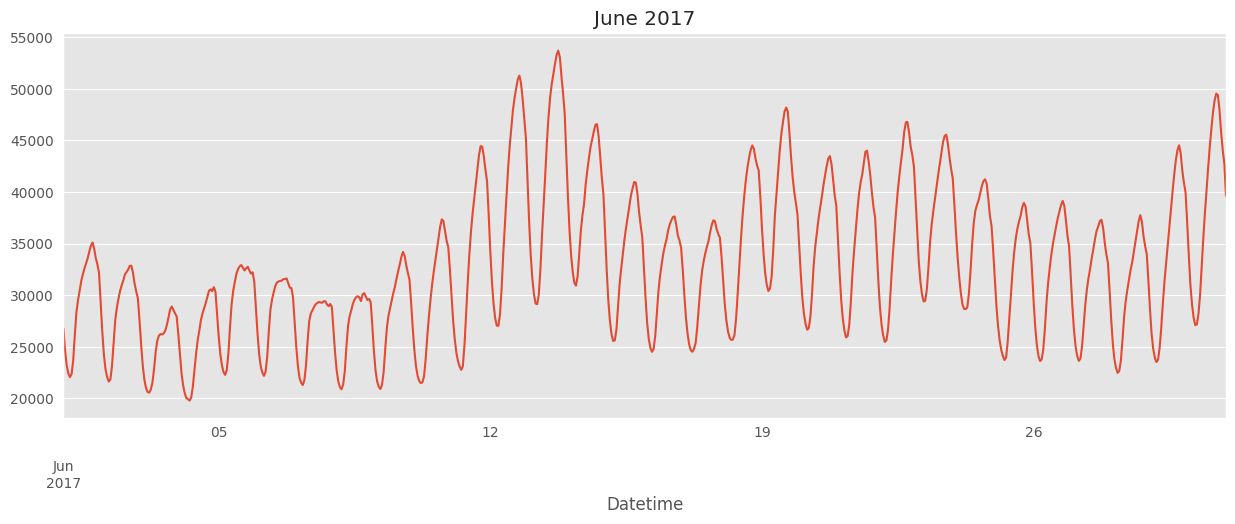

In [12]:
_ = df['PJME'].loc[(df['PJME'].index >= '2017-06-01') &
               (df['PJME'].index < '2017-07-01')] \
     .sort_index() \
    .plot(figsize=(15, 5), title = 'June 2017')

### Create Time Series Features

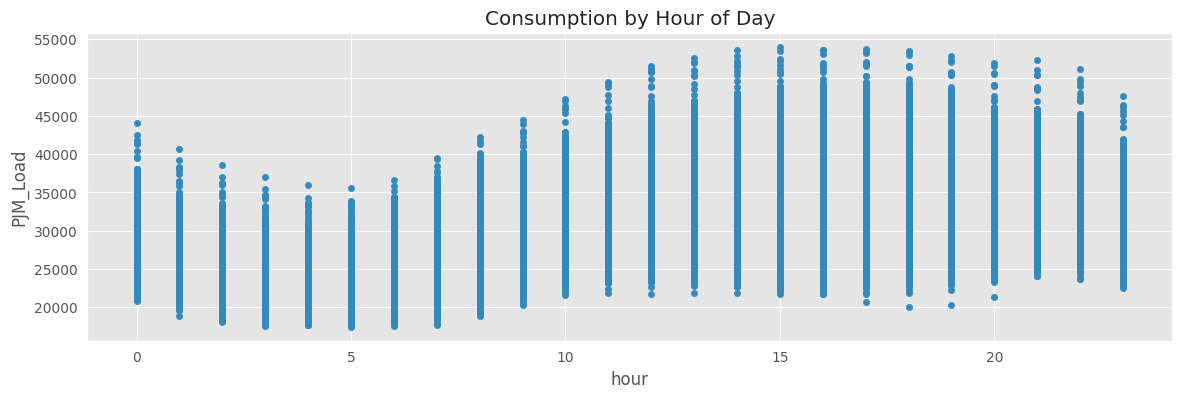

In [13]:
df['dow'] = df.index.dayofweek
df['doy'] = df.index.dayofyear
df['year'] = df.index.year
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['woy'] = df.index.isocalendar().week
df['dom'] = df.index.day # Day of Month
df['date'] = df.index.date

_ = df[['PJM_Load','hour']].plot(x='hour',
                                     y='PJM_Load',
                                     kind='scatter',
                                     figsize=(14,4),
                                     title='Consumption by Hour of Day')

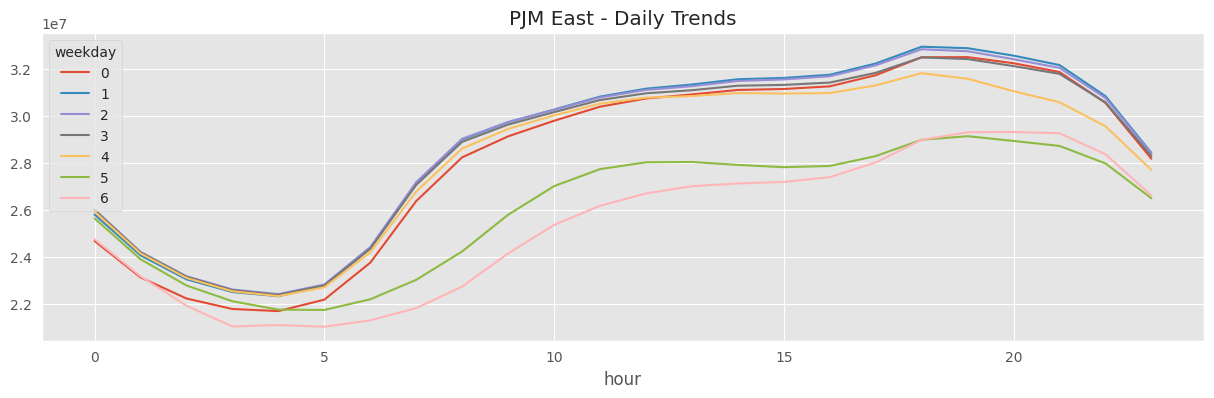

In [14]:
_ = df.pivot_table(index=df['hour'],
                     columns='weekday',
                     values='PJME',
                     aggfunc='sum').plot(figsize=(15,4),
                     title='PJM East - Daily Trends')

### Trends change depending on time of year


/tmp/ipykernel_73571/1259187758.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


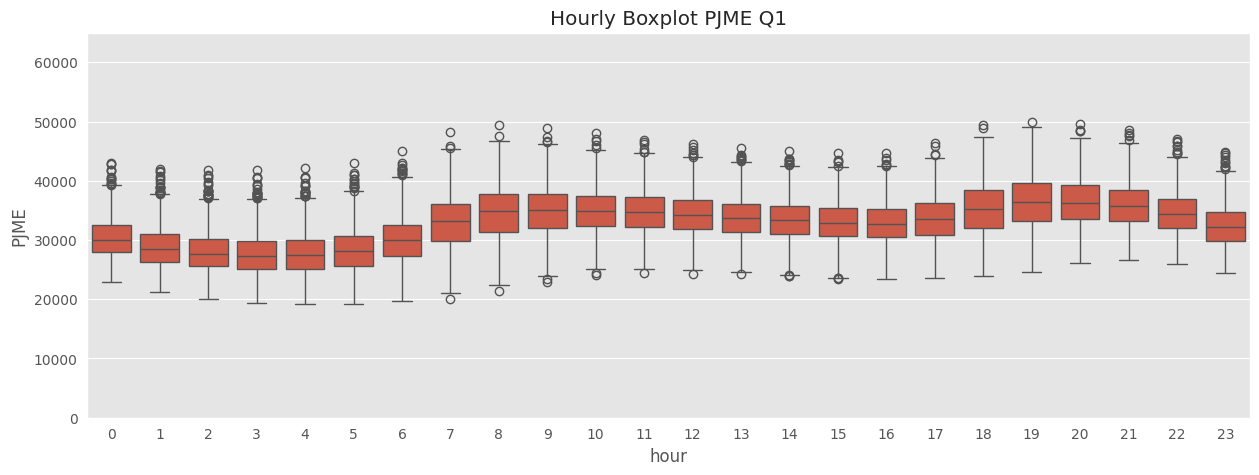

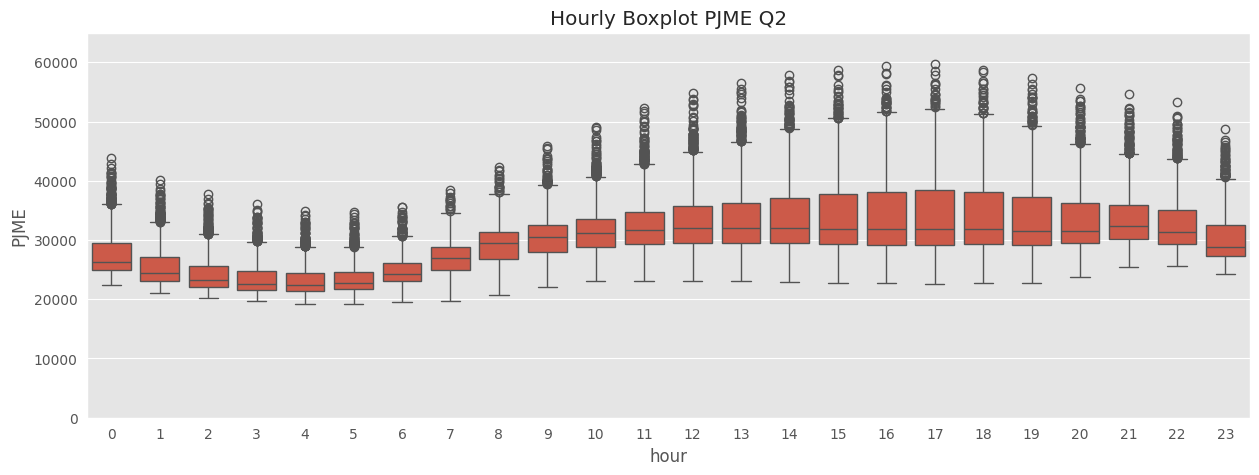

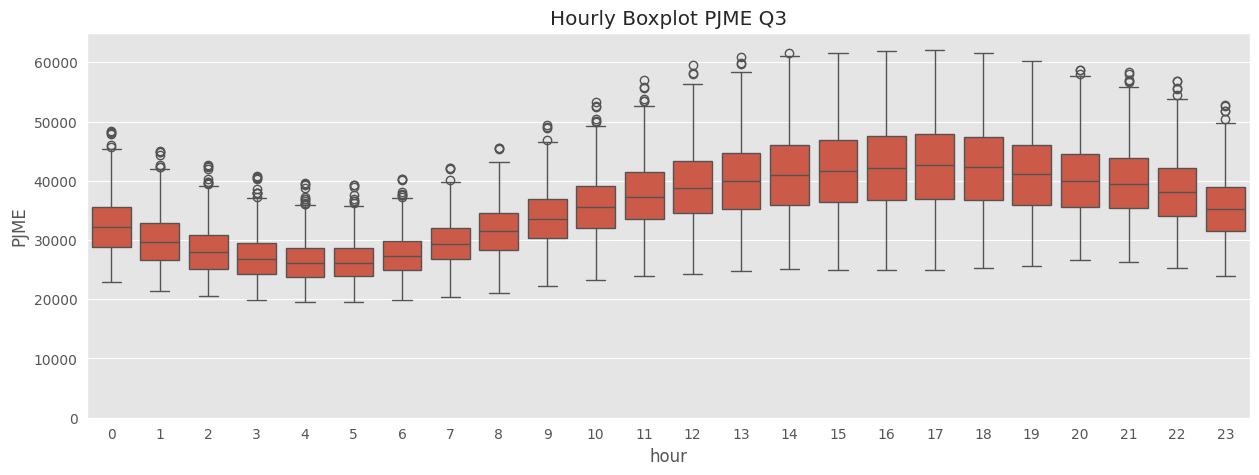

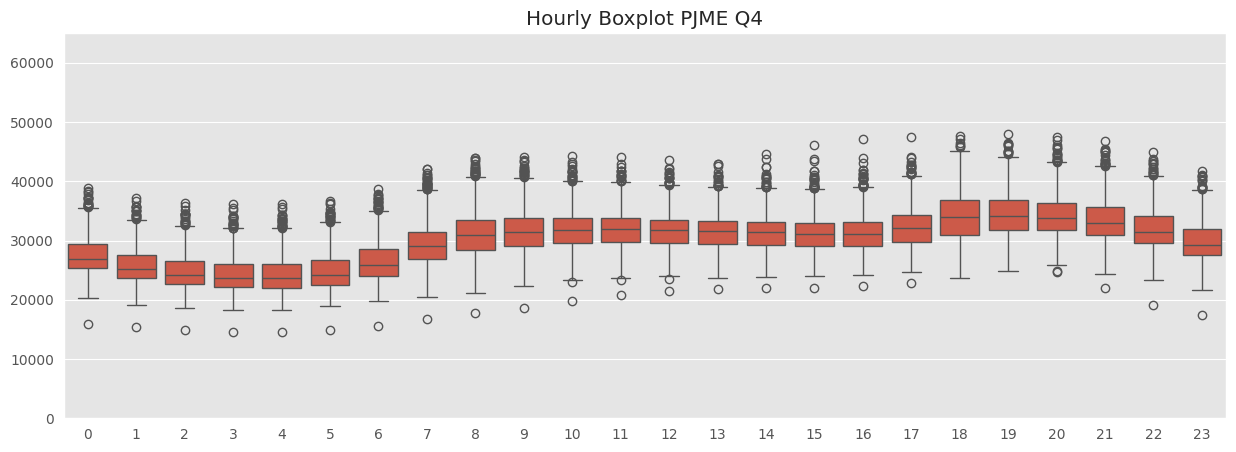

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x=df.loc[df['quarter']==1, 'hour'], y=df.loc[df['quarter']==1, 'PJME'], ax=ax)
ax.set_title('Hourly Boxplot PJME Q1')
ax.set_ylim(0,65000)
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x=df.loc[df['quarter']==2, 'hour'], y=df.loc[df['quarter']==2, 'PJME'], ax=ax)
ax.set_title('Hourly Boxplot PJME Q2')
ax.set_ylim(0,65000)
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x=df.loc[df['quarter']==3, 'hour'], y=df.loc[df['quarter']==3, 'PJME'], ax=ax)
ax.set_title('Hourly Boxplot PJME Q3')
ax.set_ylim(0,65000)
fig, ax = plt.subplots(figsize=(15,5))
quarter_4_data = df.loc[df['quarter']==4]
sns.boxplot(x=quarter_4_data['hour'].values, y=quarter_4_data['PJME'].values, ax=ax)
ax.set_title('Hourly Boxplot PJME Q4')
ax.set_ylim(0,65000)
fig.show()